5


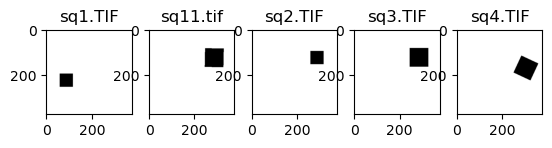

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os 

def read_imgs(directory):
    imgs = []
    titles = []
    for img in np.sort(os.listdir(directory)):
        imgs.append(plt.imread(directory + '/' + img))
        titles.append(img)
    return imgs, titles

squares, square_titles = read_imgs("./Pictures/square")

print(len(squares))
fig, ax = plt.subplots(1,5)

for i in range(len(squares)):
    ax[i].imshow(squares[i])
    ax[i].set_title(square_titles[i])


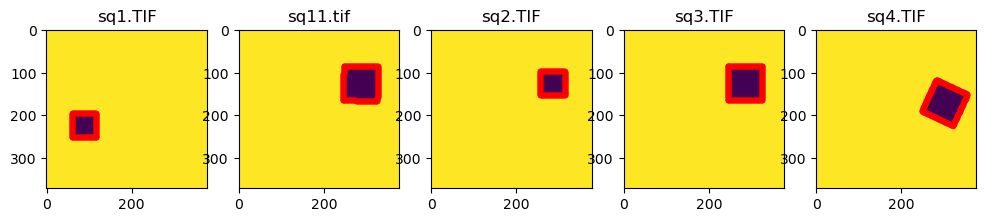

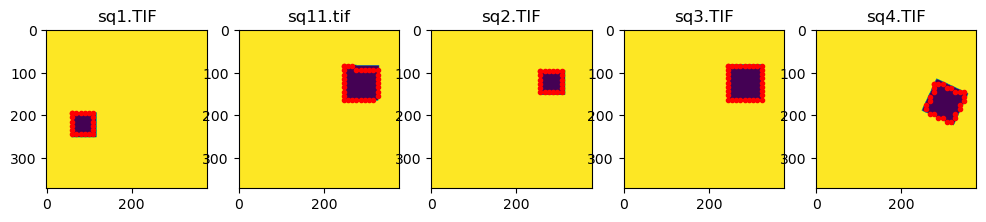

In [2]:
def to_2x2(img):
    img = img.copy()
    if img.shape[2] == 4:
        img = img[:,:,0:3]

    if img.shape[2] == 3:
        img[:, :, 0] = img[:, :, 0] + img[:, :, 1] + img[:, :, 2]
        img = img[:,:,0]
    img[img>0] = 255
    img[img==0] = 0
    return img

def find_starting(img):
    row, column = np.where(img==0)
    min_index = ((row**2 + column**2) ** (1/2)).argmin()   
    return np.array([row[min_index], column[min_index]])

    
def get_pixel_index(i, sample_rate):
    i = i % 8
    if sample_rate < 0:
        f = int(1 / sample_rate)
    else:
        f = sample_rate
    if i == 0:
        return np.array([0,-f])
    if i == 1:
        return np.array([-f,-f])
    if i == 2:
        return np.array([-f,0])
    if i == 3:
        return np.array([-f,f])
    if i == 4:
        return np.array([0,f])
    if i == 5:
        return np.array([f,f])
    if i == 6:
        return np.array([f,0])
    if i == 7:
        return np.array([f,-f])
             

def follow(img, sample_rate):
    i = 0
    pixel_index = 0
    c = []
    b = []
    b.append(find_starting(img))
    c.append(b[0] + get_pixel_index(pixel_index, sample_rate))

    i += 1
    counter = 0
    while counter == 0 or not np.all(b[0]==b[counter]):
        pix = b[counter] + get_pixel_index(pixel_index, sample_rate)
        if img[pix[0],pix[1]] == 0:
            b.append(b[counter] + get_pixel_index(pixel_index, sample_rate))
            c.append(b[counter] + get_pixel_index(pixel_index-1, sample_rate))
            counter += 1
            pixel_index -= 1
        else:
            pixel_index += 1

    return np.array(b)

img = squares[0]
img = to_2x2(img)
b= follow(img, 3)

fig, ax = plt.subplots(1,5, figsize=(12,4))
for i in range(len(squares)):
    img = to_2x2(squares[i])
    border = follow(img, 1)
    ax[i].imshow(img)
    ax[i].scatter(border[:,1], border[:,0], marker='.', color='red')
    ax[i].set_title(square_titles[i])
    
    
fig, ax = plt.subplots(1,5, figsize=(12,4))
for i in range(len(squares)):
    img = to_2x2(squares[i])
    border = follow(img, 10)
    ax[i].imshow(img)
    ax[i].scatter(border[:,1], border[:,0], marker='.', color='red')
    ax[i].set_title(square_titles[i])

"\nplt.figure()\nfor i in range(len(squares)):\n    img = squares[i]\n    fft = fourier_descriptors(img, 1)    \n    plt.plot(fft*-1, marker='.', linestyle='dashed', alpha=0.4)\nplt.legend(square_titles)\n"

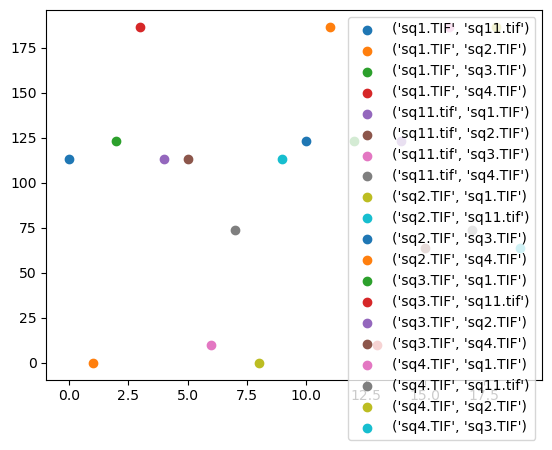

<Figure size 640x480 with 0 Axes>

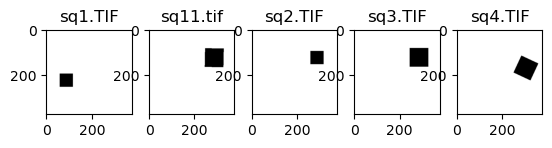

In [8]:
from itertools import permutations, product

def fourier_descriptors(border):
   
    # translation invariance
    # translation = np.array([border[:, 0].mean(), border[:,1].mean()])   
    # border = border - translation
       
    c_border = border[:,0] + 1j * border[:,1] 
    fft = np.fft.fft(c_border)
    
    # translation invariance
    fft[0] = 0   
    
    # scaling
    fft = fft / np.abs(fft[1])    
    return fft, np.linalg.norm(fft)

def shift(buffer, count):
    if type(buffer) == np.ndarray:
        buffer = buffer.tolist()
        
    for i in range(0, count):
        element = buffer.pop()
        buffer.insert(0, element)
    return np.array(buffer)


def compare(img1, img2, sample_rate):
    img1 = to_2x2(img1)
    border1 = follow(img1, sample_rate)
    fft1, fft1_norm = fourier_descriptors(border1)   
    
    img2 = to_2x2(img2)
    border2 = follow(img2, sample_rate)
    fft2, fft2_norm = fourier_descriptors(border2)
   
    #min_diff = np.abs(fft1 - fft2)
    min_diff_norm = np.abs(np.linalg.norm(fft1) - np.linalg.norm(fft2))
    return min_diff_norm
        
    
    
    
    
    
    
    
    
img = squares[0]

# fft = fourier_descriptors(img, 1)


#diff = compare(squares[0], squares[1], 1)
#plt.figure()
#plt.scatter([0], [diff], title=['0, 1'])

#x = np.arange(0, len(squares - 1)**2)


perm = permutations(squares, 2)
titles = [t for t in permutations(square_titles, 2)]
for i, p in enumerate(perm):
    plt.scatter([i], compare(*p, 1))
    
plt.legend(titles)

plt.figure()
fig, ax = plt.subplots(1,5)

for i in range(len(squares)):
    ax[i].imshow(squares[i])
    ax[i].set_title(square_titles[i])



"""
plt.figure()
for i in range(len(squares)):
    img = squares[i]
    fft = fourier_descriptors(img, 1)    
    plt.plot(fft*-1, marker='.', linestyle='dashed', alpha=0.4)
plt.legend(square_titles)
"""

[1 1 0 0 0 0 0 0]
[0 1 1 0 0 0 0 0]
[0 0 1 1 0 0 0 0]
[0 0 0 1 1 0 0 0]
[0 0 0 0 1 1 0 0]
[0 0 0 0 0 1 1 0]
[0 0 0 0 0 0 1 1]
[1 0 0 0 0 0 0 1]
